In [1]:
import pandas as pd
import seaborn as srn
import statistics  as est

In [4]:
#importar os dados da planilha tempo.csv:
dataset = pd.read_csv("tempo.csv", sep=";")
#para visualizarmos o cabeçalho da planilha, usa-se:
dataset.head()

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85,85.0,FALSO,nao
1,sol,80,90.0,VERDADEIRO,nao
2,nublado,83,86.0,FALSO,sim
3,chuva,70,NaN,FALSO,sim
4,chuva,68,80.0,FALSO,sim


In [8]:
#Exploraremos a Coluna Aparencia. Aceita-se apenas 3 entradas. Sol, nublado e chuva. Caso haja alguma entrada diferente, iremos substituir:
agrupado = dataset.groupby(['Aparencia']).size()
agrupado

Aparencia
chuva      5
menos      1
nublado    3
sol        5
dtype: int64

<AxesSubplot:xlabel='Aparencia'>

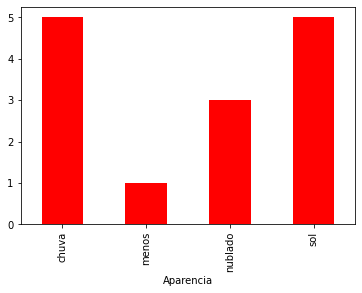

In [9]:
#executando o gráfico de barras, obtemos:
agrupado.plot.bar(color ='red')

Aparencia
chuva      5
nublado    3
sol        6
dtype: int64

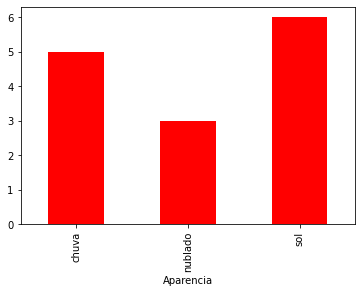

In [13]:
#nota-se a existência de uma entrada não aceita, a chamada "menos". Com isso, iremos substituir "menos" por uma entrada válida. Nesse caso será a entrada "sol":
dataset.loc[dataset['Aparencia'] == 'menos', 'Aparencia'] = "sol"
#Rodanddo novamente o que está no bloco 8 para nova visualização:
agrupado = dataset.groupby(['Aparencia']).size()
agrupado.plot.bar(color = 'red')
agrupado

In [15]:
#Verificamos que não existe entrada inválida na coluna "Aparencia". Agora iremos explorar a coluna Temperatura. Como existe um limite entre -130 F e 130 F
#primeiramente iremos observar se não existe nenhum valor fora dessa escala. Caso haja, substituiremos pela média dos valores da coluna correspondente:
agrupado = dataset.groupby(['Temperatura']).size()
agrupado

Temperatura
64      1
65      1
68      1
69      1
70      1
71      1
72      1
75      2
80      1
81      1
83      1
85      1
1220    1
dtype: int64

In [17]:
#Verifica-se que há uma temperatura fora do padrao. Para isso, analisaremos melhor a coluna correspondente com o seguinte código:
dataset['Temperatura'].describe()

count      14.000000
mean      155.571429
std       306.433759
min        64.000000
25%        69.250000
50%        73.500000
75%        80.750000
max      1220.000000
Name: Temperatura, dtype: float64

C:\Users\Pedro\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Temperatura')

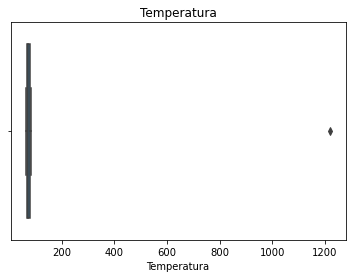

In [19]:
#observando os valores, podemos analisar o 'boxplot' dessa coluna utilizando o pacote 'seaborn':
srn.boxplot(dataset['Temperatura']).set_title('Temperatura')


In [20]:
#nota-se um ponto completamente fora da realidade, o chamado 'outliner'. Com isso, utilizaremos a mediana para aproximar esse ponto para o mais próximo da nossa realidade.:
mediana = est.median(dataset['Temperatura'])
mediana

73.5

In [21]:
#após calcularmos a mediana, substituiremos esse valor para refazermos o novo boxplot:
dataset.loc[(dataset['Temperatura'] <  -130 )  | ( dataset['Temperatura'] >  130), 'Temperatura'] = mediana

In [22]:
#Ao executarmos o código anterior sem a parte de igualdade, verificamos se há alguma linha fora dos nossos parâmetroes definidos:
dataset.loc[(dataset['Temperatura'] <  -130 )  | ( dataset['Temperatura'] >  130), 'Temperatura']

Series([], Name: Temperatura, dtype: float64)

C:\Users\Pedro\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Temperatura')

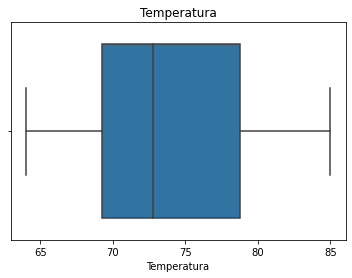

In [23]:
#Com isso, temos o novo 'boxplot' com os respectivos quartis e média.
srn.boxplot(dataset['Temperatura']).set_title('Temperatura')

In [24]:
#Agora, iremos para a coluna umidade. Nota-se uma entrada numérica inválida. verificamos se existe em alguma outra coluna essa invalidez:
dataset.isnull().sum()

Aparencia      0
Temperatura    0
Umidade        1
Vento          1
Jogar          0
dtype: int64

In [26]:
#nota-se o erro em duas colunas. Primeiramente em "Umidade", faremos algo parecido com anteriormente. Substituiremos o valor nulo pela média da coluna. Com isso:
mediana = est.median(dataset['Umidade'])
mediana

85.5

In [27]:
dataset['Umidade'].fillna(mediana, inplace=True)

In [28]:
#Verificando se ainda há valores nulos:
dataset['Umidade'].isnull().sum()

0

In [29]:
#Os parametros de umidade são entre 0 e 100. Com isso, como fizemos em temperatura, verificamos se ainda há linhas fora dos padrões definidos:
dataset.loc[(dataset['Umidade'] <  0 )  | ( dataset['Umidade'] >  100), 'Umidade']

9    200.0
Name: Umidade, dtype: float64

In [30]:
agrupado = dataset.groupby(['Umidade']).size()
agrupado

Umidade
65.0     1
70.0     3
75.0     1
80.0     1
85.0     1
85.5     1
86.0     1
90.0     2
91.0     1
95.0     1
200.0    1
dtype: int64

C:\Users\Pedro\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Umidade')

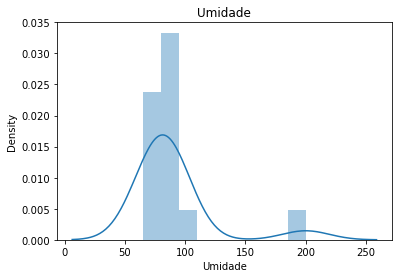

In [31]:
#Verificamos que existe um valor fora dos padrões. Analisaremos graficamente primeiro:
srn.distplot(dataset['Umidade']).set_title('Umidade')

In [33]:
 #como o valor de 200 está fora do parâmetro, usaremos a mediana para substituí-lo:
dataset.loc[(dataset['Umidade'] <  0 )  | ( dataset['Umidade'] >  100) ]

,Aparencia,Temperatura,Umidade,Vento,Jogar
9,chuva,75.0,200.0,NaN,sim


In [38]:
#substituindo e verificando novamente:
dataset.loc[(dataset['Umidade'] <  0 )  | ( dataset['Umidade'] >  100), 'Umidade'] = mediana
dataset.loc[(dataset['Umidade'] <  0 )  | ( dataset['Umidade'] >  100) ]

,Aparencia,Temperatura,Umidade,Vento,Jogar


C:\Users\Pedro\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Umidade')

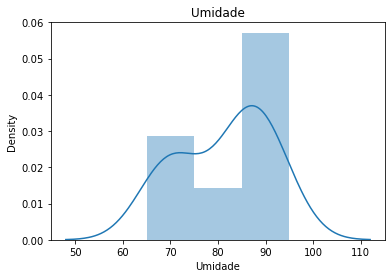

In [39]:
#como não há mais pontos fora dos padrões, analisaremos graficamente:
srn.distplot(dataset['Umidade']).set_title('Umidade')

In [40]:
#verificaremos se existe mais colunas com valores nulos:
dataset.isnull().sum()

Aparencia      0
Temperatura    0
Umidade        0
Vento          1
Jogar          0
dtype: int64

In [42]:
#Existe um valor nulo na coluna "vento". Como essa coluna admite apenas valortes de verdadeiro ou falso, iremos substituir pela maior recorrência. Para isso, utilizaremos:
agrupado = dataset.groupby(['Vento']).size()
agrupado

Vento
FALSO         7
VERDADEIRO    6
dtype: int64

In [43]:
#como a maior aparição é de Falsos, adicionaremos esse valor no espaço nulo:
dataset['Vento'].fillna('FALSO', inplace=True)

In [44]:
#verificaremos se ainda existe algum valor nulo na nossa tabela:
dataset.isnull().sum()

Aparencia      0
Temperatura    0
Umidade        0
Vento          0
Jogar          0
dtype: int64

In [45]:
agrupado = dataset.groupby(['Vento']).size()
agrupado

Vento
FALSO         8
VERDADEIRO    6
dtype: int64

In [ ]:
#Com isso, finalizamos nosso tratamento de dados retirando os erros de repetição, entradas inválidas ou falta de preencimento